# Guild calculations and barplots

# 0) Import needed data

### a) Silva OTUs

In [2]:
# mirroring from `SF_Guild_OTU bars etc...

In [ ]:
# otu_V <- read.table("../silvaOTUs/Silva_OTU_VSTcpm.txt", sep='\t')

In [3]:
# Import OTU Table
SilvaOTUs <- read.table("../silvaOTUs/Silva_OTU_VSTcpm.txt", sep='\t')#, row.names=1)
row.names(SilvaOTUs) <-SilvaOTUs[,"OTU"]                                # Make OTU row names -- required!!!

In [4]:
#SilvaOTUs# [SilvaOTUs=='Archaea']

In [5]:
# SilvaOTUs["OTU"]  # row.names(SilvaOTUs) # 
otu_V <- SilvaOTUs

In [6]:
# Sort OTU table                                                                      
otu_V <-otu_V[order(otu_V$Consensus.lineage),]                                                         # sort by lineage

# Make new top level plotting var (should be in PRE-PROCESS ? )
otu_V$Taxonomy <- ifelse(otu_V$Phylum == "Proteobacteria", paste(otu_V$Class), paste(otu_V$Phylum))    # head(otu_V)
otu_V <- data.frame(otu_V)

In [7]:
#SilvaOTUs

In [8]:

# OTU_v <- read.table("SF_Sal_OTU_VSTcpm.txt", sep='\t', header=T, row.names=1)                          # dim(OTU_v); head(OTU_v)
# OTU_v <- read.table("../silvaOTUs/Silva_OTU_VSTcpm.txt", sep='\t', header=T, row.names=1)                          # dim(OTU_v); head(OTU_v)




# 1) Calculate aggregate guild abundances

#### ***DUE TO ISSUES WITH SILVA***

- **NOTE CHANGED MOB IIa to Family=='Beijerinckiaceae', "MOB_IIa"** 
- FROM Family=='Methylocystaceae', "MOB_IIa",  (as in Kneif 2015)

due to taxonomic reassingment in SILVA (elsewhere)???  These were in Family=='Methylocystaceae' before
"k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Beijerinckiaceae;g__Methylosinus"
"k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Beijerinckiaceae;g__Methylocystis"

- **Note ALSO had to change (no CH4ac) **
- from: Order=='Methanosarcinales'
- to:   Order=='Methanosarciniales'

In [9]:
# source("../modules/OTU_subsetting_modules_v.0.3_strip.R")   # ITAGGER VERSION # MOB IIa == Methylocystaceae
source("../modules/3_OTU_subsetting_modules_v.0.4_strip.r")  # SILVA VERSION    # MOB IIa == Beijerinckiaceae 

In [10]:
# use function for getting 16s Guilds
Guild_OTUs <- Get_16S_Guilds(otu_V)              # use Get_16S_Guilds to get guilds
# Guild_OTUs <- Get_16S_Guilds(SilvaOTUs)              # use Get_16S_Guilds to get guilds

In [11]:
# dim(Guild_OTUs); head(Guild_OTUs)

In [12]:
#Guild_OTUs[Guild_OTUs['Guild'] == 'CH4_H2']
#Guild_OTUs[Guild_OTUs['Guild'] == 'SRB']

In [13]:
#otu_V["OTU"] <- row.names(otu_V)
OTU_guilds <- merge(Guild_OTUs, otu_V)#, by="OTU")# all.y=TRUE)
head(OTU_guilds)# ; tail(OTU_guilds)

,OTU,Guild,Sandmound_TuleA_D1,Sandmound_TuleA_D2,Sandmound_TuleB_D1,Sandmound_TuleB_D2,Sandmound_TuleC_D1,Sandmound_TuleC_D2,Sandmound_CattailA_D1,Sandmound_CattailA_D2,⋯,Muzzi_PWC_D1,Muzzi_PWC_D2,Consensus.lineage,Kingdom,Phylum,Class,Order,Family,Genus,Taxonomy
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,otu_ASV_10,SRB,264.166555,554.743884,1673.89485,201.948320,20.945186,377.06772,553.46068,15.627442,⋯,2426.568547,832.142805,k__Bacteria;p__Desulfobacterota;c__Desulfuromonadia;o__Desulfuromonadales;f__Sva1033;g__,Bacteria,Desulfobacterota,Desulfuromonadia,Desulfuromonadales,Sva1033,Sva1033FA,Desulfobacterota
2,otu_ASV_10011,SRB,4.984275,5.492514,76.08613,9.616587,6.981729,5.46475,5.17253,5.209147,⋯,7.929963,7.364096,k__Bacteria;p__Desulfobacterota;c__Desulfomonilia;o__Desulfomonilales;f__Desulfomonilaceae;g__Desulfomonile,Bacteria,Desulfobacterota,Desulfomonilia,Desulfomonilales,Desulfomonilaceae,Desulfomonile,Desulfobacterota
3,otu_ASV_1002,SRB,4.984275,16.477541,76.08613,9.616587,6.981729,5.46475,15.51759,5.209147,⋯,15.859925,7.364096,k__Bacteria;p__Desulfobacterota;c__Desulfobulbia;o__Desulfobulbales;f__Desulfobulbaceae;g__,Bacteria,Desulfobacterota,Desulfobulbia,Desulfobulbales,Desulfobulbaceae,DesulfobulbaceaeFA,Desulfobacterota
4,otu_ASV_10027,SRB_syn,39.874197,38.447596,76.08613,57.699520,13.963458,60.11225,67.24289,36.464031,⋯,7.929963,7.364096,k__Bacteria;p__Desulfobacterota;c__Syntrophobacteria;o__Syntrophobacterales;f__Syntrophobacteraceae;g__Desulfovirga,Bacteria,Desulfobacterota,Syntrophobacteria,Syntrophobacterales,Syntrophobacteraceae,Desulfovirga,Desulfobacterota
5,otu_ASV_10035,SRB,4.984275,5.492514,76.08613,9.616587,6.981729,5.46475,5.17253,5.209147,⋯,7.929963,7.364096,k__Bacteria;p__Desulfobacterota;c__Desulfuromonadia;o__Desulfuromonadales;f__Geothermobacteraceae;g__Geothermobacter,Bacteria,Desulfobacterota,Desulfuromonadia,Desulfuromonadales,Geothermobacteraceae,Geothermobacter,Desulfobacterota
6,otu_ASV_10043,FeOB,4.984275,5.492514,76.08613,9.616587,6.981729,5.46475,5.17253,5.209147,⋯,7.929963,7.364096,k__Bacteria;p__Spirochaetota;c__Leptospirae;o__Leptospirales;f__Leptospiraceae;g__RBG-16-49-21,Bacteria,Spirochaetota,Leptospirae,Leptospirales,Leptospiraceae,RBG-16-49-21,Spirochaetota


In [14]:
levels(OTU_guilds[,2])

[1] "CH4_H2"  "CH4_ac"  "MOB_I"   "MOB_II"  "MOB_IIa" "AOA"     "AOB"    
 [8] "NOB"     "Anamx"   "SOxB"    "SRB_syn" "SRB"     "FeOB"    "FeRB"

In [15]:
write.table(OTU_guilds, "Silva_OTU_Guild_taxa_counts.txt", row.names=T, col.names=T, sep='\t')

In [16]:
# OTU_guilds['Guild'] == 'MOB_IIa'

In [17]:
#OTU_guilds[OTU_guilds['Guild'] == 'MOB_IIa',]

# 2) Plot guild abundances

In [18]:
# source("../modules/5_OTU_barplots_module_v0.3.7.R")
source("../modules/5_OTU_barplots_module_v0.4.R")       # working under R 4.0.2


In [19]:
# Get guilds color scheme
Guild_cols <- read.table("../data/colors/Guild_color_palette.txt", sep='\t') 
Guild_vars <-c("Guild", "G_index", "color")
Guild_cols <- Guild_cols[Guild_vars]
colnames(Guild_cols) <- c("Guild", "Index", "color")
Guild_cols['Index'] <- rev(Guild_cols[,'Index'])
# Guild_cols


In [20]:
# Import site colors
site_colors <- read.table("../data/colors/Sal_siteColors_testR.txt", sep='\t', header=T, row.names=1)               # site_colors
colnames(site_colors) <-c('color','Location')                                                        # site_colors
site_colours <- (site_colors$color)                          

In [21]:
## REPLOT without SRB
#nope <- as.list("SRB, SRB_syn")
noSRB <- OTU_guilds[!OTU_guilds$Guild=="SRB",]
noSRBs <- noSRB[!noSRB$Guild=="SRB_syn",]
noSROBs <- noSRBs[!noSRBs$Guild=="SOxB",]
noFeRB <- noSROBs[!noSROBs$Guild=="FeRB",]
noFeROB <- noFeRB[!noFeRB$Guild=="FeOB",]
clean_guilds <- noFeROB[!noFeROB$Guild=="MeOB",]
#Guilds_noSRB <- OTU_guilds[!SRB]
#Guilds_noSRB
head(clean_guilds)

,OTU,Guild,Sandmound_TuleA_D1,Sandmound_TuleA_D2,Sandmound_TuleB_D1,Sandmound_TuleB_D2,Sandmound_TuleC_D1,Sandmound_TuleC_D2,Sandmound_CattailA_D1,Sandmound_CattailA_D2,⋯,Muzzi_PWC_D1,Muzzi_PWC_D2,Consensus.lineage,Kingdom,Phylum,Class,Order,Family,Genus,Taxonomy
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
7,otu_ASV_10077,MOB_I,54.827021,16.477541,76.08613,9.616587,20.945186,5.46475,150.00336,15.627442,⋯,7.929963,7.364096,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Methylococcales;f__Methylomonadaceae;g__,Bacteria,Proteobacteria,Gammaproteobacteria,Methylococcales,Methylomonadaceae,MethylomonadaceaeFA,Gammaproteobacteria
14,otu_ASV_10173,AOB,214.323808,159.282897,76.08613,192.331734,237.378780,355.20873,160.34842,244.829921,⋯,7.929963,7.364096,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Nitrosomonadaceae;g__mle1-7,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Nitrosomonadaceae,mle1-7,Gammaproteobacteria
24,otu_ASV_10285,CH4_H2,34.889922,38.447596,76.08613,48.082933,13.963458,81.97124,41.38024,36.464031,⋯,7.929963,7.364096,k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobacterium,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobacterium,Euryarchaeota
27,otu_ASV_10318,AOB,14.952824,5.492514,76.08613,9.616587,20.945186,21.85900,15.51759,5.209147,⋯,7.929963,22.092287,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Nitrosomonadaceae;g__MND1,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Nitrosomonadaceae,MND1,Gammaproteobacteria
29,otu_ASV_10335,MOB_II,4.984275,5.492514,76.08613,9.616587,6.981729,5.46475,5.17253,5.209147,⋯,7.929963,7.364096,k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Methyloligellaceae;g__,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Methyloligellaceae,MethyloligellaceaeFA,Alphaproteobacteria
34,otu_ASV_10389,CH4_H2,134.575415,455.878637,76.08613,336.580534,216.433593,530.08071,98.27806,26.045736,⋯,7.929963,7.364096,k__Archaea;p__Thermoplasmatota;c__Thermoplasmata;o__Methanomassiliicoccales;f__;g__,Archaea,Thermoplasmatota,Thermoplasmata,Methanomassiliicoccales,MethanomassiliicoccalesOR,MethanomassiliicoccalesOR,Thermoplasmatota


In [22]:
metaDB <-read.table("../data/meta/SF_sal_meta_FIX3.5.txt", sep="\t", header=TRUE)               # import Mapping    # # try keeping all params...


In [23]:
#metaDB

In [24]:
Site_sort_G <- abund_loc_barplot(OTU_guilds, "Guild", metaDB, "EWsiteHyd_index", "", Guild_cols)

Using Guild as id variables



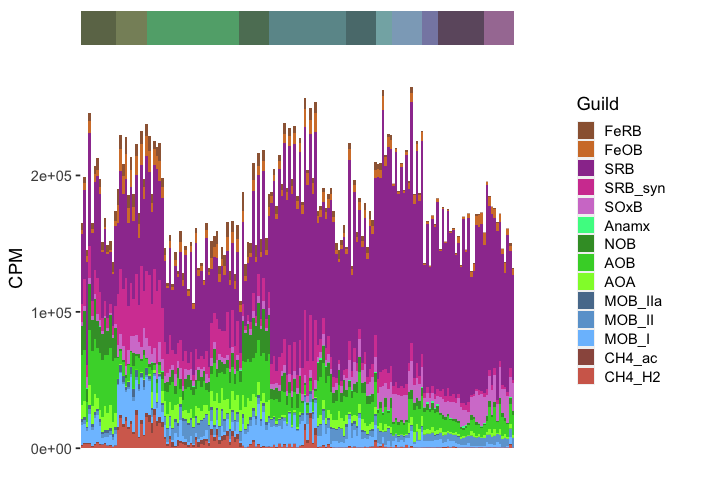

In [25]:
options(repr.plot.width=6, repr.plot.height=4) 
Site_sort_G

In [26]:
Site_sort_G <- abund_loc_barplot(clean_guilds, "Guild", metaDB, "EWsiteHyd_index", "", Guild_cols)

Using Guild as id variables



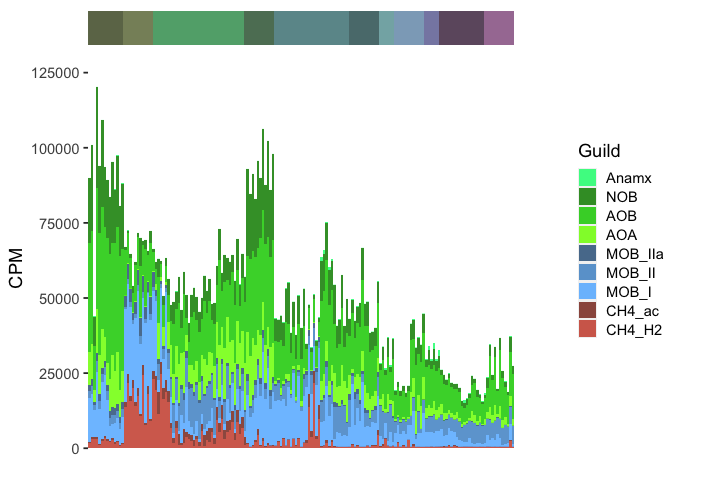

In [27]:
Site_sort_G

### sort by CH4

In [28]:
# metaDB <-read.table("../data/meta/SF_sal_meta_FIX3.5.txt", sep="\t", header=TRUE)               # import Mapping    # # try keeping all params...

In [29]:
min(metaDB['CH4_ug_m2_h'])

[1] -0.3413328

In [30]:
# Get log CH4 data, note n + 1 here is 0 = min + 5%
metaDB['CH4_logn1'] =  log10(metaDB['CH4_ug_m2_h'] - 1.05*min(metaDB['CH4_ug_m2_h']))

### plot it

Using Guild as id variables



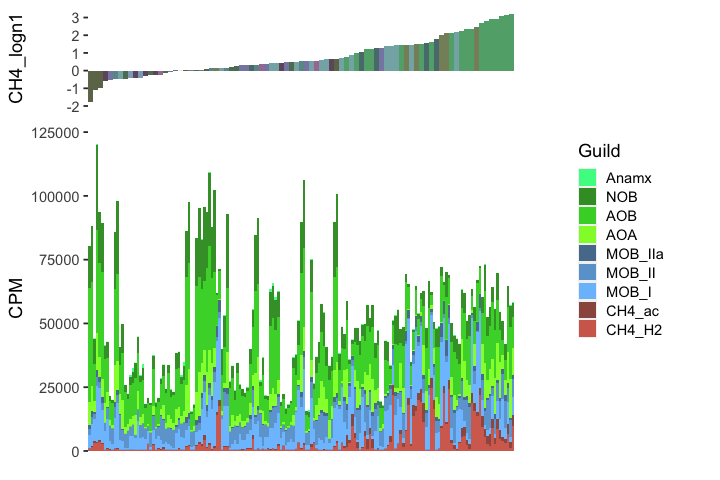

In [31]:
CH4_sort_G <- abund_loc_barplot(clean_guilds, "Guild", metaDB, "CH4_logn1", "graph", Guild_cols)
CH4_sort_G

Want to show as proportion, but not working!?  Similar works in tax comp. ipynb

In [32]:
# Want to show as proportion, but not working!?  Similar works in tax comp. ipynb
clean_guilds2 <- na.omit(clean_guilds)  # ah, some strange NAs, and row indexing in function
# dim(clean_guilds2)

Using Guild as id variables



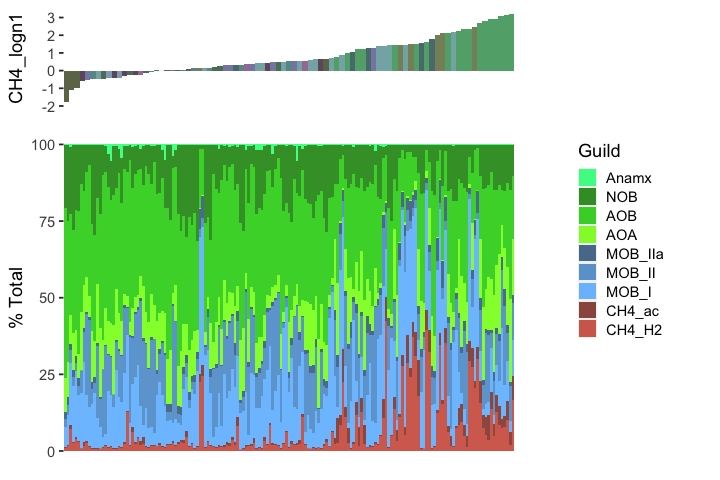

In [33]:
CH4_sort_G2 <- abund_loc_barplot(clean_guilds2, "Guild", metaDB, "CH4_logn1", "graph", Guild_cols, relab = '% Total')
# CH4_sort_G2 <- abund_loc_barplot(clean_guilds2, "Guild", metaDB, "EWsiteHyd_index", "", Guild_cols, relab = '% Total')

CH4_sort_G2

Using Guild as id variables



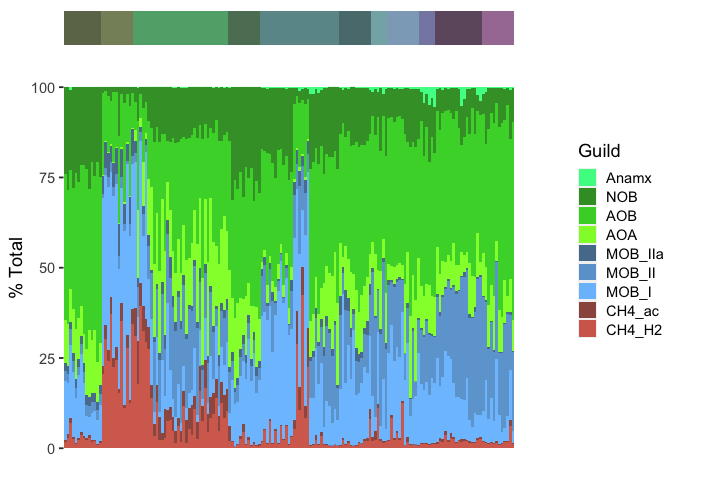

In [34]:
CH4_sort_G3 <- abund_loc_barplot(clean_guilds2, "Guild", metaDB, "EWsiteHyd_index", "", Guild_cols, relab = '% Total')
CH4_sort_G3

# 3) Plot tradeoffs 
- Note 2 axis plot MUCH better in python, unless I am missing something in ggplot

In [35]:
# aggregate guilds
Guild_abund <- agg_by_cat(OTU_guilds, "Guild")
# Guild_abund

In [36]:
Guild_abundT <- data.frame(t(Guild_abund[,-1]))
Guild_abundT['Methanogen'] <- (Guild_abundT[,"CH4_H2"] + Guild_abundT[,"CH4_ac"])
Guild_abundT['Methanotroph'] <- (Guild_abundT[,"MOB_I"] + Guild_abundT[,"MOB_II"] + Guild_abundT[,"MOB_IIa"])
Guild_abundT['Methanogen_Troph'] <- Guild_abundT['Methanogen']/Guild_abundT[,'Methanotroph']
#Guild_abundT['Methanogen_Troph'] <- (Guild_abundT[,"CH4_H2"] + Guild_abundT[,"CH4_ac"])/Guild_abundT[,'Methanotroph']


#Guild_abundT['Methanogen_Troph'] <- (Guild_abundT[,"CH4_H2"] + Guild_abundT[,"CH4_ac"])/(Guild_abundT[,"MOB_I"] + Guild_abundT[,"MOB_II"] + Guild_abundT[,"MOB_IIa"])
Guild_abundT['AOA_NOB'] <- (Guild_abundT[,"AOA"])/(Guild_abundT[,"NOB"])# + Guild_abundT[,"MOB_II"] + Guild_abundT[,"MOB_IIa"])
Guild_abundT['AO_NOB'] <- (Guild_abundT[,"AOA"]+Guild_abundT[,"AOB"])/(Guild_abundT[,"NOB"])# + Guild_abundT[,"MOB_II"] + Guild_abundT[,"MOB_IIa"])

#Guild_abundT['Methanogen : Troph'] <-  with(Guild_abundT, ("CH4_H2" + "CH4_ac")/("MOB_I" + "MOB_II" + "MOB_IIa"))
# head(Guild_abundT)

In [37]:
# Write table for LASSO 
write.table(Guild_abundT, "Silva_OTU_Guild_abundT_counts.txt", row.names=T, col.names=T, sep='\t')

In [38]:
# Add sample, merge with site class RESTORED or NOT
Guild_abundT["Sample"] <- row.names(Guild_abundT)                      #head(Guild_abundT)

# Get sample names & Restoration & relevel 
restor <-c("Sample", "EWcoastGroup")
Samp_restor <- metaDB[restor]
levels(Samp_restor$EWcoastGroup) <-c("Historic", "Restored")
colnames(Samp_restor) <-c("Sample", "restor")
# Merge with Guilds
Guild_abundT_rest <- merge(Guild_abundT, Samp_restor)

head(Guild_abundT_rest)

,Sample,CH4_H2,CH4_ac,MOB_I,MOB_II,MOB_IIa,AOA,AOB,NOB,Anamx,⋯,SRB_syn,SRB,FeOB,FeRB,Methanogen,Methanotroph,Methanogen_Troph,AOA_NOB,AO_NOB,restor
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Browns_ThreeSqA_D1,825.7035,252.7664,16193.90,3988.092,2016.514,14508.791,32135.03,19946.08,22.46812,⋯,5021.626,39869.68,2982.643,8790.653,1078.4699,22198.51,0.04858300,0.7274007,2.338496,SF_Ref
2,Browns_ThreeSqA_D2,2494.6973,793.2448,28855.72,4701.987,2391.231,9478.700,30718.12,26717.40,34.48890,⋯,16364.985,72639.38,6932.270,9271.767,3287.9421,35948.93,0.09146146,0.3547762,1.504518,SF_Ref
3,Browns_ThreeSqB_D1,461.2249,213.2545,15696.52,3476.544,1889.534,12666.326,33560.31,19649.17,19.83763,⋯,5108.189,45155.40,3541.017,9427.833,674.4794,21062.60,0.03202260,0.6446239,2.352600,SF_Ref
4,Browns_ThreeSqB_D2,1179.2068,581.4522,25105.69,3912.576,2227.994,7292.606,29849.69,32186.37,32.60480,⋯,16682.788,78610.17,7390.421,7743.639,1760.6591,31246.26,0.05634783,0.2265744,1.153976,SF_Ref
5,Browns_ThreeSqC_D1,590.0793,189.6683,12312.64,4209.584,2023.129,14330.497,30004.48,22196.46,21.07426,⋯,6527.752,47311.71,3345.539,9104.081,779.7476,18545.35,0.04204545,0.6456207,1.997389,SF_Ref
6,Browns_ThreeSqC_D2,730.7473,374.5847,17544.08,3230.026,1915.909,11372.638,34038.08,28800.04,36.84440,⋯,11685.816,56365.79,6490.755,9604.107,1105.3320,22690.01,0.04871448,0.3948827,1.576759,SF_Ref


In [47]:
# Two axes ? 
#p <- ggplot(Guild_abundT_rest, aes(x=AOA_NOB))  
p <- ggplot(Guild_abundT_rest, aes(x=log10(AO_NOB)))  

#p + ggplot(Guild_abundT_rest, aes(x=log10(AOA_NOB), y=(Methanotroph)))# + 
p <-    p +    geom_point(aes(y=(Methanogen_Troph*25000),shape=restor), color="red") + scale_shape_manual(values=c(19, 2))  #+

p <- p + geom_point(aes(y=(Methanotroph),shape=restor), color="blue")  #+
p <- p + scale_y_continuous(sec.axis = sec_axis(~./25000, name = "Methanotroph"), limits = c(0, 60000))# +
#            coord_trans(x="log") 
#p <- p + scale_x_continuous(limits = c(0, 6), trans='log10') #+ scale_y_continuous(limits = c(0, 6000)) +
p <- p + scale_x_continuous(limits = c(0, 1)) + #scale_y_continuous(limits = c(0, 60000)) +
        theme(legend.title=element_blank())       + 
        theme_bw() + theme(panel.border = element_blank(), panel.grid.major = element_blank(),
              panel.grid.minor = element_blank(), axis.line = element_line(colour = "black"), 
              legend.title=element_blank()) #+

Warning message:
“Removed 13 rows containing missing values (geom_point).”
Warning message:
“Removed 9 rows containing missing values (geom_point).”


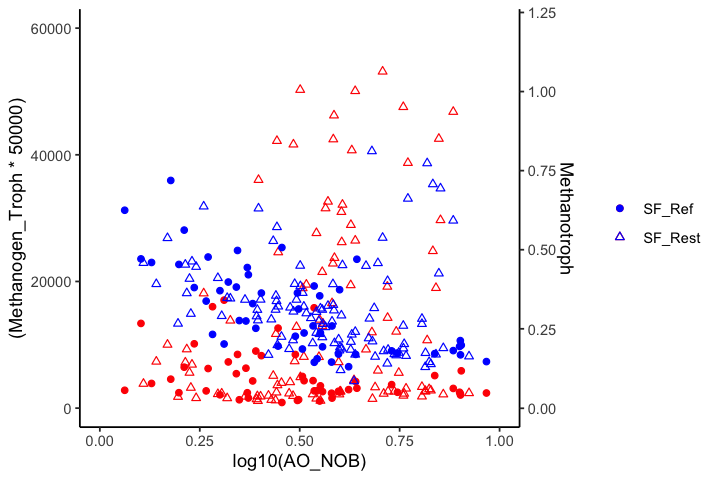

In [46]:
options(repr.plot.width=6, repr.plot.height=4)
p

## 4) Delta methaontrophs, methanogens

In [ ]:
# Read pre-calculated CORRELATION table (Here, OTU level)
CH4corrRanksOTU_Delta <- read.table("../taxon_analysis/correlations/CH4corrRanks_Silva_Delta_OTU.txt", sep = '\t')

# CORRELATION FILTER RESULTS
CorrFilt_OTU_Delta <- OTU_corr_filt_OTU(Delta_OTU, CH4corrRanksOTU_Delta, "Genus", 0.6)
corrOTUs <- as.character(CorrFilt_OTU_Delta$OTU) 

#### get Delta sites subset info

In [59]:
# Prune metadata to only iTag samples
# Get Sample names in OTU table               
OTU_samps <- data.frame('Sample'=colnames(otu_V))                                        # OTU_samps

# Merge site order and Samples
Meta_iTag <- merge(metaDB, OTU_samps, by='Sample')                                       #colnames(metaDB)
rownames(Meta_iTag) <- Meta_iTag$Sample

# Separate Delta Sites (oligo and FW)
# levels(Meta_iTag$SALTgroup)
Meta_iTag_FW <- Meta_iTag[Meta_iTag$SALTgroup =="FW",]
Meta_iTag_Oligo <- Meta_iTag[Meta_iTag$SALTgroup =="Oligo",]

Meta_iTag_Delta <-rbind(Meta_iTag_FW, Meta_iTag_Oligo)                  # Meta_iTag_Delta

Delta_sites <-Meta_iTag_Delta[,"Sample"]                                # Delta sites

# Subset OTU table by Delta sites
tax_cols <- c("Consensus.lineage", "Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Taxonomy")
Delta_tax <- c(Delta_sites, tax_cols)
guilds <- c('OTU', 'Guild')
Guild_delta_tax <- c(guilds, Delta_tax)
# Delta_OTU = otu_V[Delta_tax]

#### Subset clean guild data

In [60]:
# Delta_subset
head(clean_guilds2)
Delta_guilds = clean_guilds2[Guild_delta_tax]

,OTU,Guild,Sandmound_TuleA_D1,Sandmound_TuleA_D2,Sandmound_TuleB_D1,Sandmound_TuleB_D2,Sandmound_TuleC_D1,Sandmound_TuleC_D2,Sandmound_CattailA_D1,Sandmound_CattailA_D2,⋯,Muzzi_PWC_D1,Muzzi_PWC_D2,Consensus.lineage,Kingdom,Phylum,Class,Order,Family,Genus,Taxonomy
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
7,otu_ASV_10077,MOB_I,54.827021,16.477541,76.08613,9.616587,20.945186,5.46475,150.00336,15.627442,⋯,7.929963,7.364096,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Methylococcales;f__Methylomonadaceae;g__,Bacteria,Proteobacteria,Gammaproteobacteria,Methylococcales,Methylomonadaceae,MethylomonadaceaeFA,Gammaproteobacteria
14,otu_ASV_10173,AOB,214.323808,159.282897,76.08613,192.331734,237.378780,355.20873,160.34842,244.829921,⋯,7.929963,7.364096,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Nitrosomonadaceae;g__mle1-7,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Nitrosomonadaceae,mle1-7,Gammaproteobacteria
24,otu_ASV_10285,CH4_H2,34.889922,38.447596,76.08613,48.082933,13.963458,81.97124,41.38024,36.464031,⋯,7.929963,7.364096,k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobacterium,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobacterium,Euryarchaeota
27,otu_ASV_10318,AOB,14.952824,5.492514,76.08613,9.616587,20.945186,21.85900,15.51759,5.209147,⋯,7.929963,22.092287,k__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Nitrosomonadaceae;g__MND1,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Nitrosomonadaceae,MND1,Gammaproteobacteria
29,otu_ASV_10335,MOB_II,4.984275,5.492514,76.08613,9.616587,6.981729,5.46475,5.17253,5.209147,⋯,7.929963,7.364096,k__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Methyloligellaceae;g__,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Methyloligellaceae,MethyloligellaceaeFA,Alphaproteobacteria
34,otu_ASV_10389,CH4_H2,134.575415,455.878637,76.08613,336.580534,216.433593,530.08071,98.27806,26.045736,⋯,7.929963,7.364096,k__Archaea;p__Thermoplasmatota;c__Thermoplasmata;o__Methanomassiliicoccales;f__;g__,Archaea,Thermoplasmatota,Thermoplasmata,Methanomassiliicoccales,MethanomassiliicoccalesOR,MethanomassiliicoccalesOR,Thermoplasmatota


In [70]:
# Methanotroph subset
# levels(Delta_guilds$Guild) 
methanotrophs <- c('MOB_I','MOB_II','MOB_IIa')

Delta_mtrophs <- Delta_guilds[Delta_guilds$Guild %in% methanotrophs,]


In [105]:
# Delta_mtrophs

In [80]:
# Delta_guilds$Guild
# Delta_mtrophs

Using Genus as id variables

Warning message in brewer.pal(color_no, color_set):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Using Genus as id variables



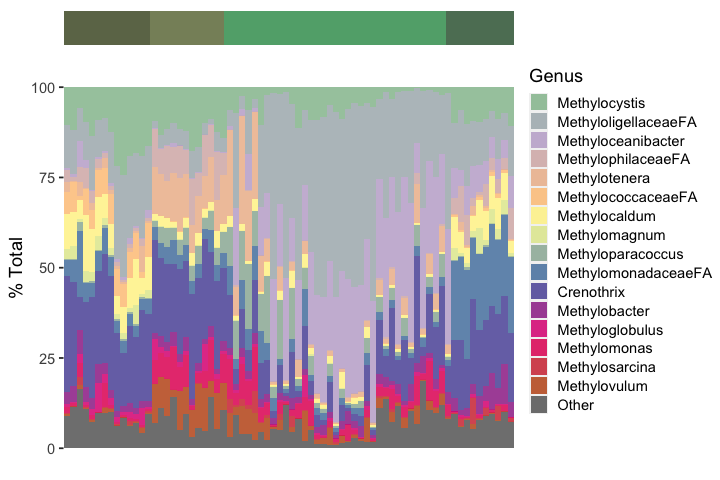

In [77]:
#CH4_sort_G3 <- 
abund_loc_barplot(Delta_mtrophs, "Genus", Meta_iTag_Delta, "EWsiteHyd_index", "", "",'Accent', relab = '% Total')
#CH4_sort_G3

Using Genus as id variables

Warning message in brewer.pal(color_no, color_set):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Using Genus as id variables



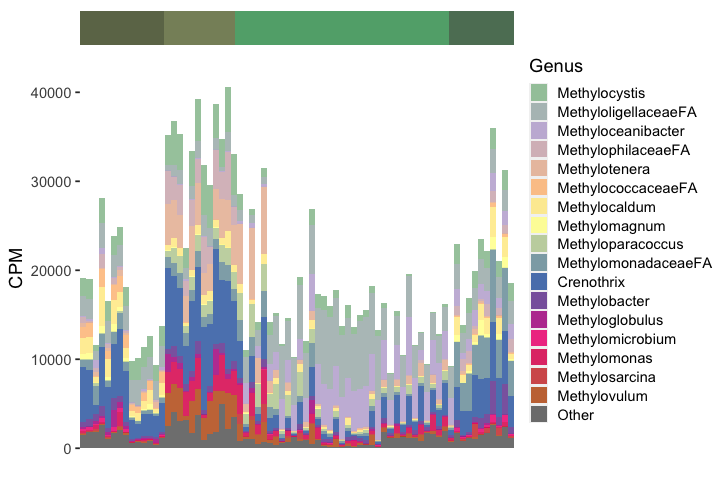

In [78]:
abund_loc_barplot(Delta_mtrophs, "Genus", Meta_iTag_Delta, "EWsiteHyd_index", "", "",'Accent')


Using Genus as id variables

Warning message in brewer.pal(color_no, color_set):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Using Genus as id variables



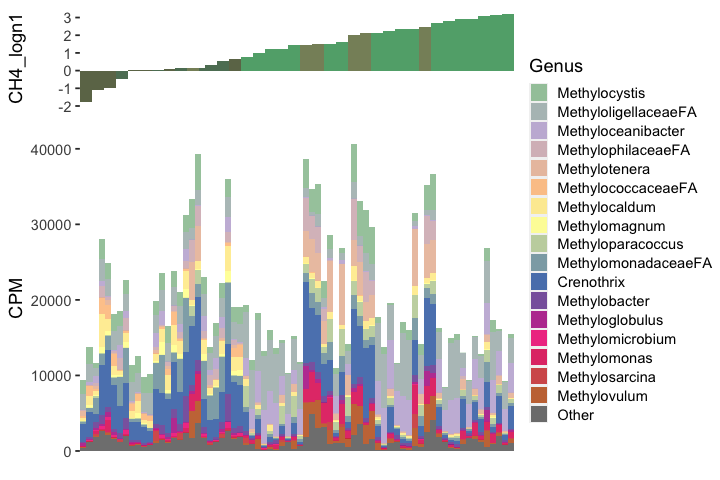

In [83]:
abund_loc_barplot(Delta_mtrophs, "Genus", Meta_iTag_Delta, "CH4_logn1", "graph", "",'Accent')


#### Correlated genera

In [131]:
corr_Delta_mtrophs <- Delta_mtrophs[Delta_mtrophs$OTU %in% corrOTUs,]

Using Genus as id variables

Warning message in brewer.pal(color_no, color_set):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Using Genus as id variables



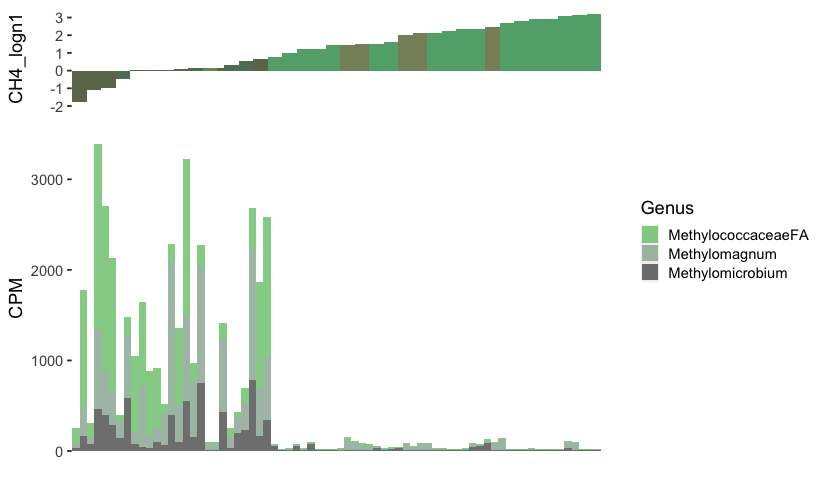

In [132]:
abund_loc_barplot(corr_Delta_mtrophs, "Genus", Meta_iTag_Delta, "CH4_logn1", "graph", "",'Accent')

In [107]:
# abund_loc_barplot(Delta_mtrophs, "Guild", Meta_iTag_Delta, "CH4_logn1", "graph", "",'Accent')


### b) Methanogens

In [87]:
levels(Delta_guilds$Guild) 

[1] "CH4_H2"  "CH4_ac"  "MOB_I"   "MOB_II"  "MOB_IIa" "AOA"     "AOB"    
 [8] "NOB"     "Anamx"   "SOxB"    "SRB_syn" "SRB"     "FeOB"    "FeRB"

In [91]:
# Methanogen subset
# levels(Delta_guilds$Guild) 
methanogens <- c('CH4_H2','CH4_ac')

Delta_mgens <- Delta_guilds[Delta_guilds$Guild %in% methanogens,]

Using Genus as id variables

Warning message in brewer.pal(color_no, color_set):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Using Genus as id variables



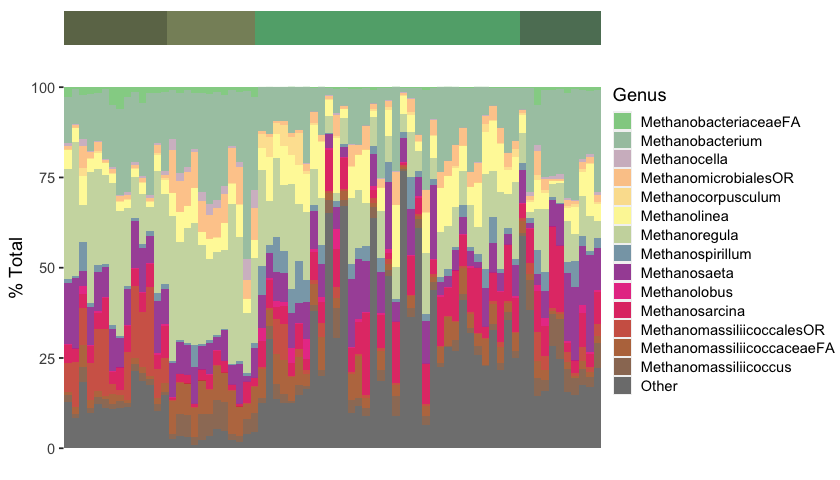

In [103]:
options(repr.plot.width=7, repr.plot.height=4)

abund_loc_barplot(Delta_mgens, "Genus", Meta_iTag_Delta, "EWsiteHyd_index", "", "",'Accent', relab = '% Total')

Using Genus as id variables

Warning message in brewer.pal(color_no, color_set):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Using Genus as id variables



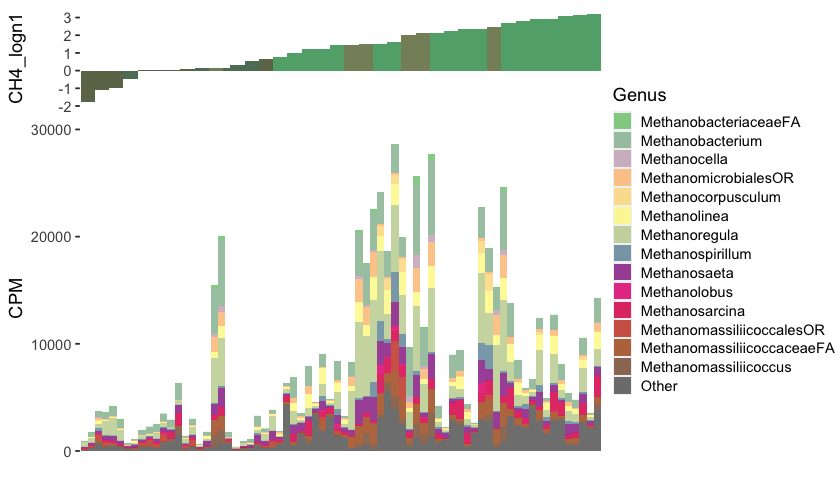

In [102]:
abund_loc_barplot(Delta_mgens, "Genus", Meta_iTag_Delta, "CH4_logn1", "graph", "",'Accent')

#### Correlated genera

In [114]:
corrOTUs <- as.character(CorrFilt_OTU_Delta$OTU) 
#corrOTUs

In [125]:
corr_Delta_mgens <- Delta_mgens[Delta_mgens$OTU %in% corrOTUs,]

Using Genus as id variables

Warning message in brewer.pal(color_no, color_set):
“n too large, allowed maximum for palette Accent is 8
Returning the palette you asked for with that many colors
”
Using Genus as id variables



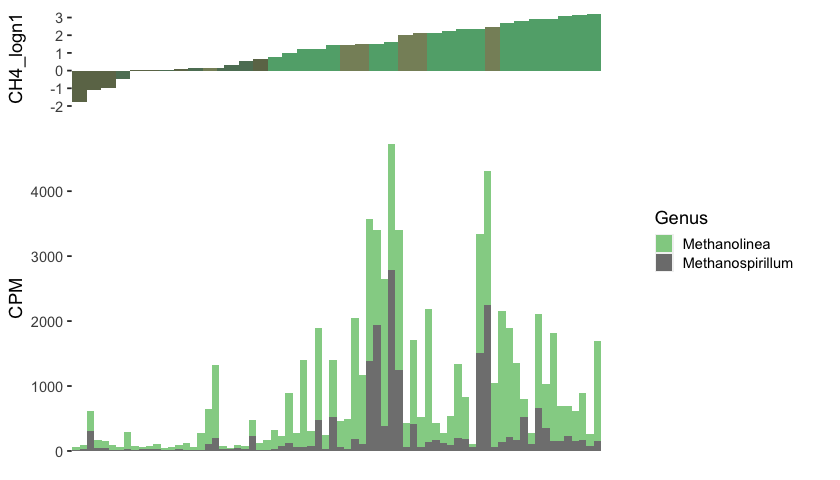

In [128]:
abund_loc_barplot(corr_Delta_mgens, "Genus", Meta_iTag_Delta, "CH4_logn1", "graph", "",'Accent')